In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.transform import resize
from skimage.io import imread, imshow
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import os

In [16]:
metadata = pd.read_csv("./../metadata.csv")
metadata = metadata.query('day == True and snow == True ')
metadata

,path,name,snow,day,node
265,./images/all/1668258019692423953-sample.jpg,1668258019692423953-sample.jpg,True,True,W014
266,./images/all/1668261619815156204-sample.jpg,1668261619815156204-sample.jpg,True,True,W014
267,./images/all/1668265221389059798-sample.jpg,1668265221389059798-sample.jpg,True,True,W014
268,./images/all/1668268820152388507-sample.jpg,1668268820152388507-sample.jpg,True,True,W014
269,./images/all/1668272421912809968-sample.jpg,1668272421912809968-sample.jpg,True,True,W014
...,...,...,...,...,...
2502,./images/all/1682294412807087334-sample.jpg,1682294412807087334-sample.jpg,True,True,W083
2503,./images/all/1682298012298710492-sample.jpg,1682298012298710492-sample.jpg,True,True,W083
2638,./images/all/1682852412008859688-sample.jpg,1682852412008859688-sample.jpg,True,True,W083
2639,./images/all/1682856012549019018-sample.jpg,1682856012549019018-sample.jpg,True,True,W083


In [17]:

def image_to_RGB(image):
    new_dim = image.shape[0] * image.shape[1]
    image = image.reshape((new_dim, 3))
    return image




In [18]:
images = []
g_images = []
n = 20
gray = True

for i, (index, row) in enumerate(metadata.sample(9).iterrows()):
        
        path = os.path.join("./../" + row['path'])
        image = imread(path)
        image = resize(image, (224,224))
        shape = image.shape
        image = image_to_RGB(image)
        
        images.append(image)
        
images = np.array(images)
print(images.shape)
        
        
        


(9, 50176, 3)


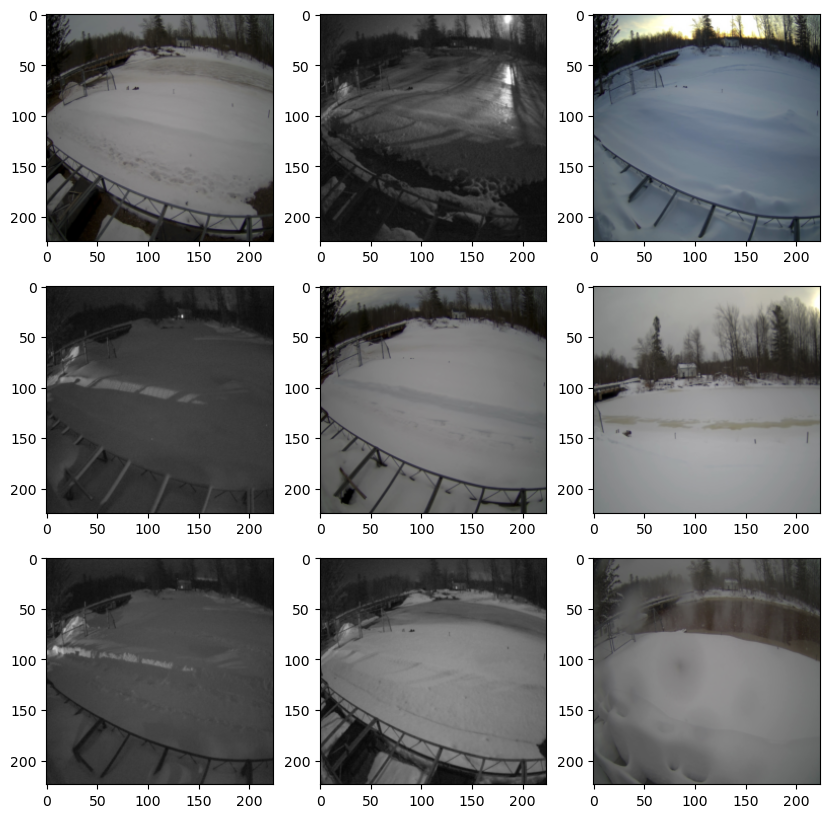

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for n, ax in enumerate(axes.flatten()):
    image = images[n].reshape(shape)   
    ax.imshow(image)
plt.show()

(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)


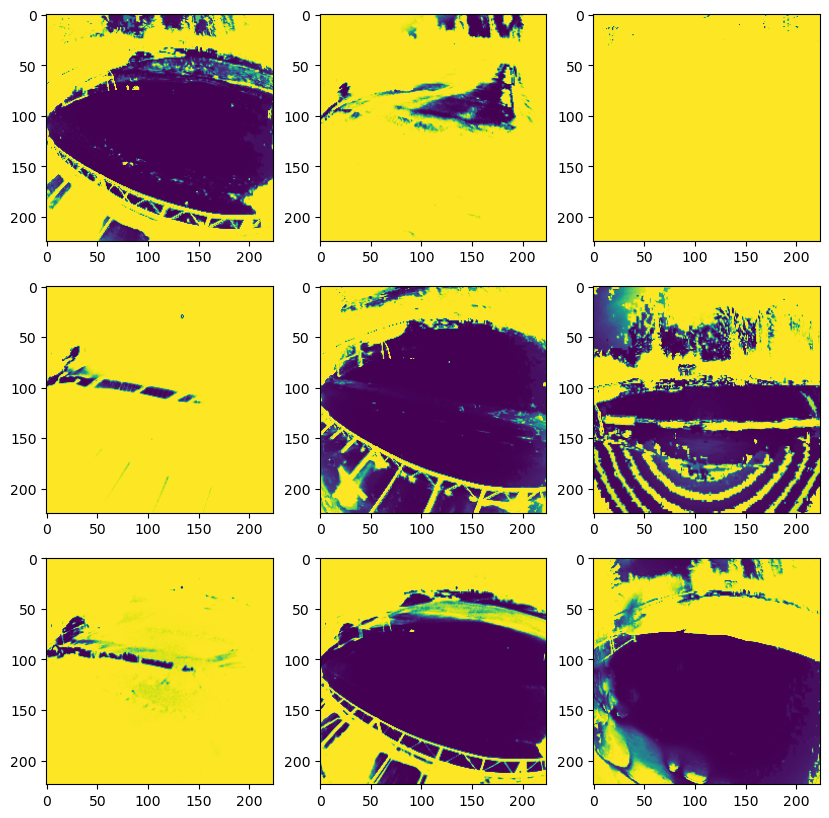

In [20]:

fig, axes = plt.subplots(3, 3, figsize=(10, 10))

gmm = GaussianMixture(n_components=  2)
image = images[0]
   
gmm.fit(image)
for n, ax in enumerate(axes.flatten()):
    image = images[n]
    pred = gmm.predict_proba(image)[:,0].reshape(shape[:2])
    print(pred.shape)
    ax.imshow(pred)
plt.show()
  

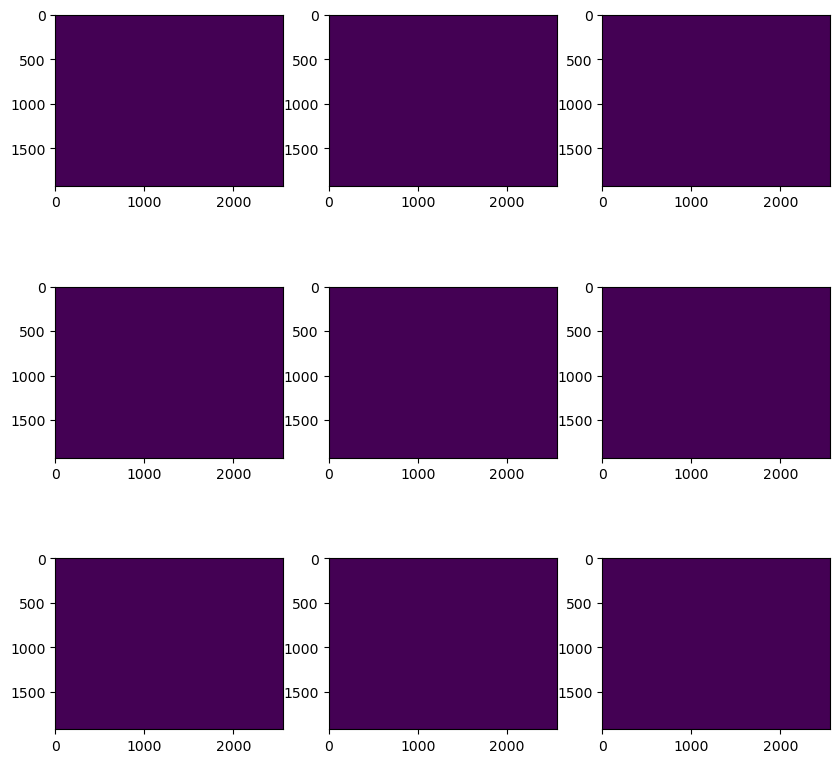

In [22]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
rows = metadata.sample(9).reset_index()

for n, ax in enumerate(axes.flatten()):
    path = os.path.join("./../" + rows.loc[n,'path'])
    image = imread(path)
    shape = image.shape
    image = image_to_RGB(image)
    pred = gmm.predict(image).reshape(shape[:2])
    ax.imshow(pred)
plt.show()


In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for n, ax in enumerate(axes.flatten()):
    path = os.path.join("./../" + rows.loc[n,'path'])
    image = imread(path)
    ax.imshow(image)
plt.show()